# Discrepancy model testing

## Alexandra Semposki

### Date: 31 August 2021

In [1]:
#import packages
import numpy as np
import math
import emcee
import corner
from cycler import cycler
from scipy import stats, special, integrate

import matplotlib.pyplot as plt
%matplotlib inline

#import classes we'll need
from mixing import Switching, Mixing, Models
from discrepancy import Discrepancy
from priors import Priors

In [2]:
new = Discrepancy()

In [3]:
g = np.linspace(1e-6, 0.5, 100)
low = np.array([5])
high = np.array([5])

Which interval do you want to use: 68 or 95?68
[0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0.]
[ 2.50662827e+00 -7.51988482e+00  1.31597984e+02 -4.34273349e+03
  2.11708257e+05 -1.36763534e+07  1.10094645e+09] 1100946451.1270757
[ 1.81280495e+00 -3.06354176e-01  5.66501548e-02 -9.57356799e-03
  1.47526445e-03 -2.09421800e-04  2.76612084e-05] 2.7661208406234037e-05


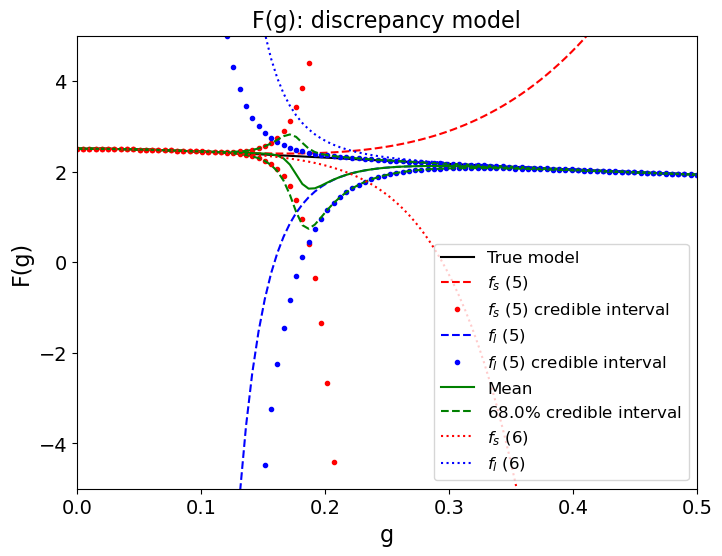

Would you like to save this figure? (yes/no)no


In [9]:
pdf = new.fdagger(g, low, high, plot_fdagger=True, next_order=True, validation=True)

Let's do some subtraction (how hard can that be?) to see if the orders match what we expect.

In [5]:
compare = Mixing()

Welcome to the BMM sandbox! Here you get to play!


In [6]:
sub_low = compare.low_g(g, np.array([6])) - compare.low_g(g, np.array([5]))
sub_high = compare.high_g(g, np.array([6])) - compare.high_g(g, np.array([5]))

print('Low: {}'.format(sub_low))
print('\nHigh: {}'.format(sub_high))

Low: [[ 0.00000000e+00 -7.21578353e-11 -4.61535121e-09 -5.25613277e-08
  -2.95294770e-07 -1.12639324e-06 -3.36325902e-06 -8.48064276e-06
  -1.88960591e-05 -3.83070940e-05 -7.20806042e-05 -1.27693808e-04
  -2.15227269e-04 -3.47909771e-04 -5.42715083e-04 -8.21010620e-04
  -1.20925799e-03 -1.73976545e-03 -2.45149221e-03 -3.39090470e-03
  -4.61288466e-03 -6.18168913e-03 -8.17196243e-03 -1.06697998e-02
  -1.37738634e-02 -1.75965494e-02 -2.22652080e-02 -2.79234142e-02
  -3.47322916e-02 -4.28718873e-02 -5.25425989e-02 -6.39666535e-02
  -7.73896384e-02 -9.30820840e-02 -1.11341098e-01 -1.32492054e-01
  -1.56890324e-01 -1.84923078e-01 -2.17011117e-01 -2.53610772e-01
  -2.95215850e-01 -3.42359630e-01 -3.95616914e-01 -4.55606128e-01
  -5.22991474e-01 -5.98485141e-01 -6.82849555e-01 -7.76899692e-01
  -8.81505441e-01 -9.97594013e-01 -1.12615241e+00 -1.26822993e+00
  -1.42494076e+00 -1.59746656e+00 -1.78705919e+00 -1.99504337e+00
  -2.22281951e+00 -2.47186649e+00 -2.74374459e+00 -3.04009839e+00
  -3.

In [7]:
v1, v2 = new.validation(g, low, high)

#calculate the 68% credibility intervals and print
sd1 = np.sqrt(v1)
sd2 = np.sqrt(v2)

print('Low: {}'.format(sd1))
print('\nHigh: {}'.format(sd2))

[0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0.]
[ 2.50662827e+00 -7.51988482e+00  1.31597984e+02 -4.34273349e+03
  2.11708257e+05 -1.36763534e+07  1.10094645e+09] 1100946451.1270757
[ 1.81280495e+00 -3.06354176e-01  5.66501548e-02 -9.57356799e-03
  1.47526445e-03 -2.09421800e-04  2.76612084e-05] 2.7661208406234037e-05
Low: [1.10094645e-63 3.03952187e-19 1.24351021e-15 1.61277022e-13
 5.09039344e-12 7.40661746e-11 6.60329154e-10 4.19853115e-09
 2.08440601e-08 8.56639815e-08 3.03302980e-07 9.51874119e-07
 2.70417275e-06 7.06599121e-06 1.71942653e-05 3.93493344e-05
 8.53645930e-05 1.76693773e-04 3.50833356e-04 6.71229462e-04
 1.24218143e-03 2.23076676e-03 3.89845534e-03 6.64587833e-03
 1.10751951e-02 1.80756894e-02 2.89396552e-02 4.55173403e-02
 7.04217347e-02 1.07296374e-01 1.61162109e-01 2.38862021e-01
 3.49627412e-01 5.05792095e-01 7.23687121e-01 1.02475372e+00
 1.43691859e+00 1.99628281e+00 2.74918398e+00 3.75469991e+00
 5.08767291e+00 6.84234453e+00 9.13670374e+00 1.21176653e+01
 1.596

No, these are not the same.